# Comparison Example: using trained models from database


In this notebook, we show some examples of comparisons between simulations of theoretical models and experimental data, being this the main goal of our software in the long term. 

This aspect of the NeuralPlayground (NPG) software is still under development. With time, we want to implement tools exclusively made to compare simulated and experimental data, such as a GUI to quickly navigate through the results, add more metrics to measure the performance of agents or similarity between neural representation.

For now, this notebook uses the three main modules of NPG, "experiments", "arenas" and "agents", to simulate theoretical models and compare with what is seen in neural recording from real experiments.  The "simulation manager" is used to run and keep track of the state of all of your runs and available results ( For ease, the results of the simulations are saved on the gin repository and fetched). 
We use the gridscore metric implemented in the framework, to compare the performance of the different model implemented as well as direct visual comparison.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
from neuralplayground.experiments import Wernle2018Data, Hafting2008Data, Sargolini2006Data
from neuralplayground.comparison import GridScorer
from neuralplayground.arenas import Simple2D, ConnectedRooms,Wernle2018, MergingRoom, Sargolini2006
from neuralplayground.agents import Weber2018, Stachenfeld2018
from neuralplayground.experiments import Wernle2018Data, Hafting2008Data
from neuralplayground.saved_models import fetch_model_path
from neuralplayground.plotting.plot_utils import make_plot_trajectories, make_plot_rate_map, make_agent_comparison

# Different Agents in Same environement


We compare two agents in the same environement and compare their representations. The runs have been previoulsy run using the simulation manager, the output was saved to the gin repositiory for ease.

## 2D environment

/home/rodrigo/SSD/Projects/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig7'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-0.4953'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.1237'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.3872'}, xlabel='width', ylabel='depth'>]],
      dtype=object)

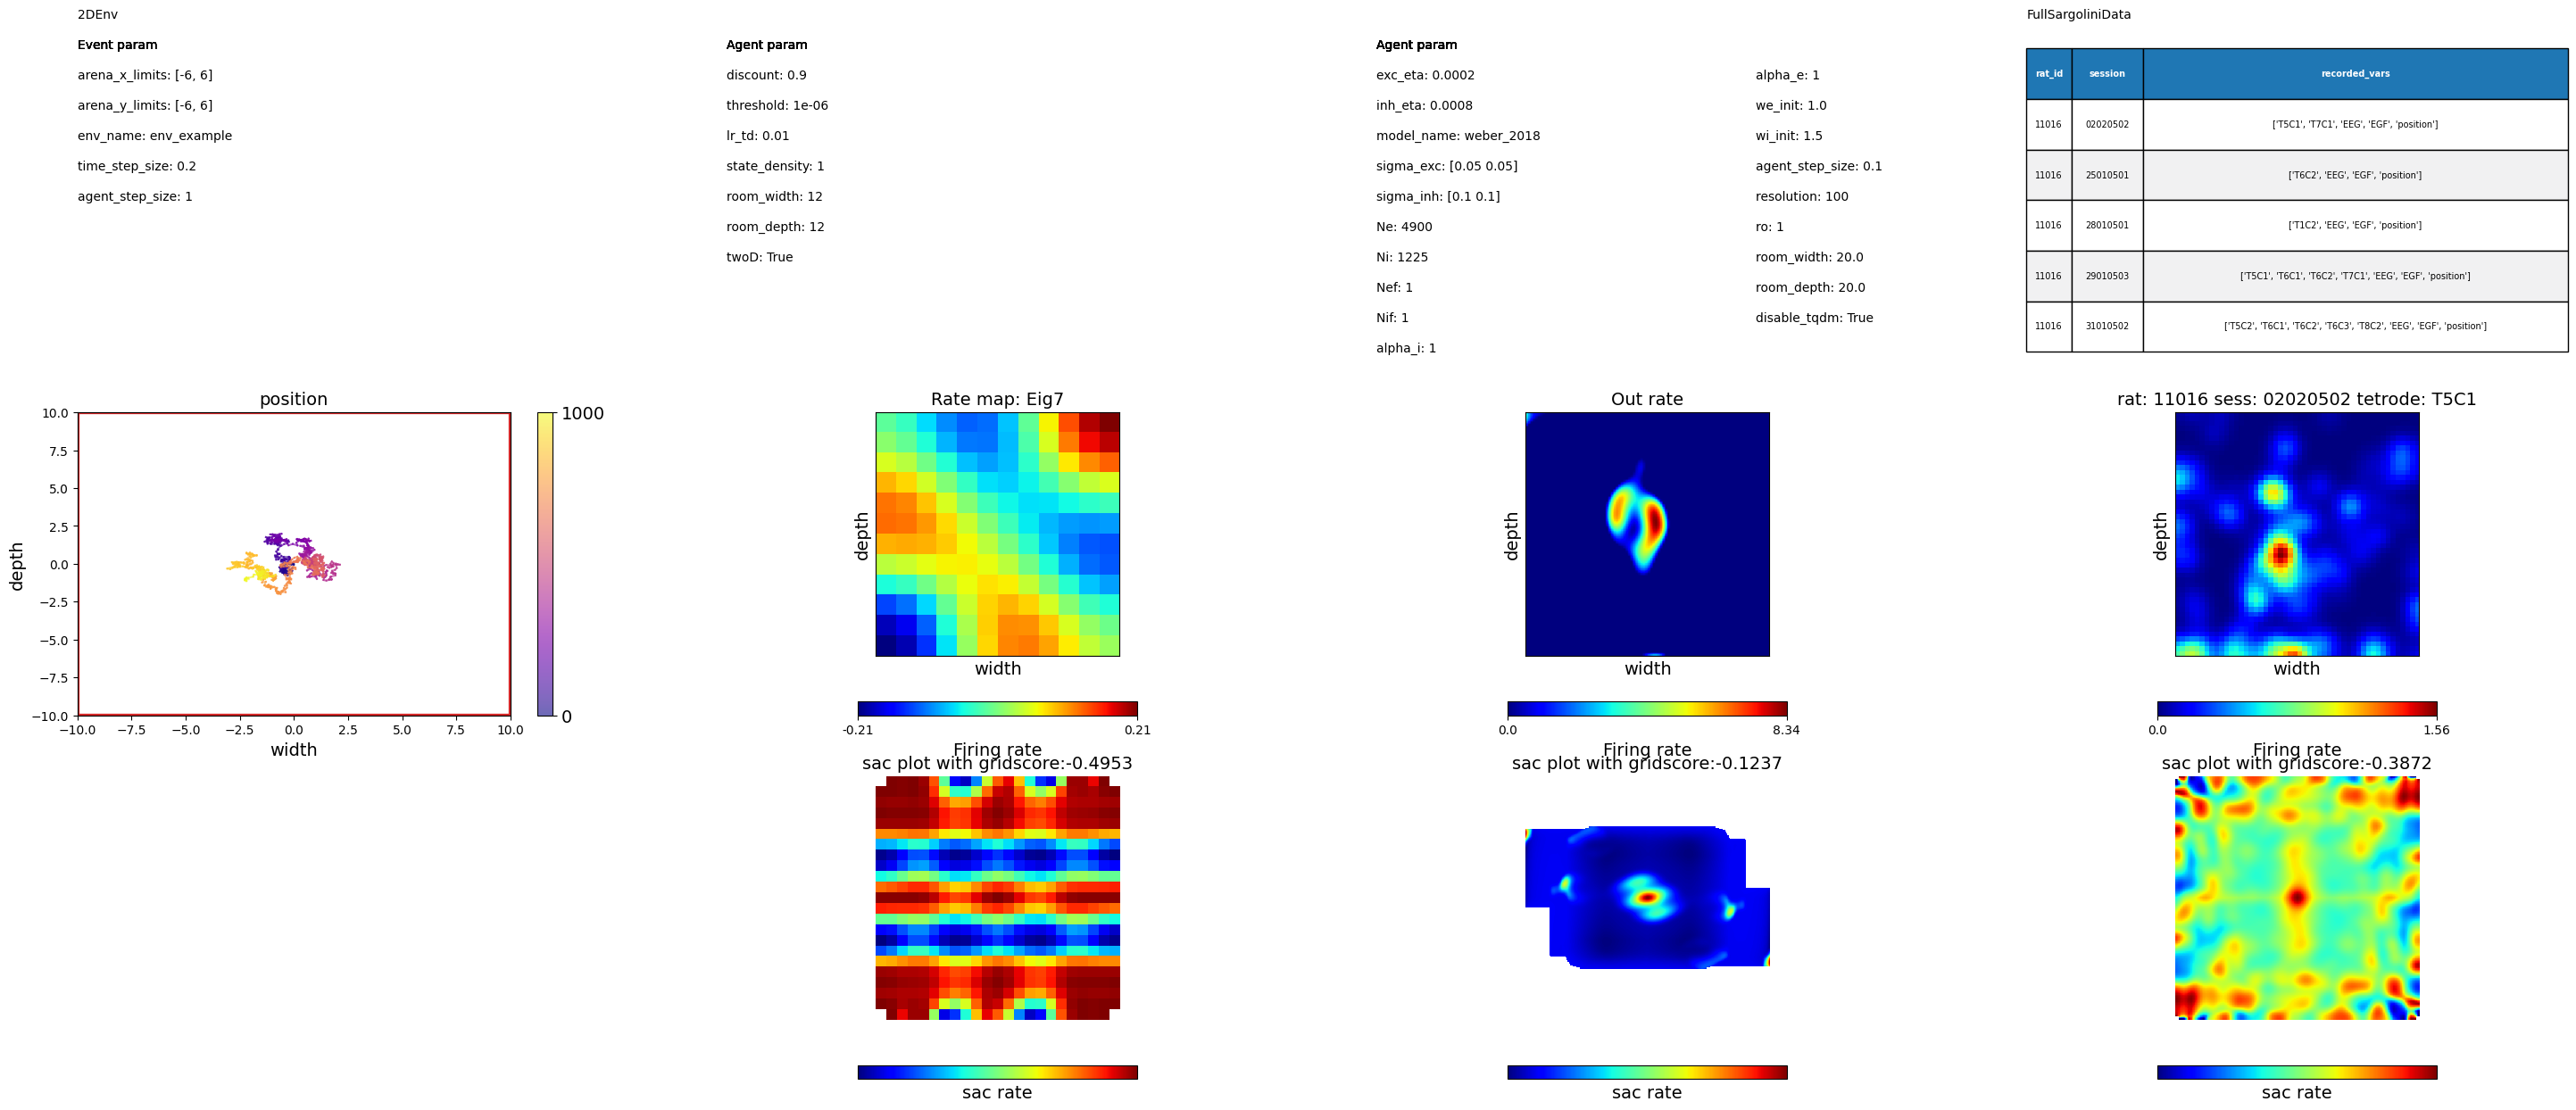

In [2]:
data_path = fetch_model_path("stachenfeld_2018_in_simple2D")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)

data_path = fetch_model_path("weber_2018_in_simple2D")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'



env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


agents=[agent_sr,agent]
parameters=[param_sr,param]
exp = Sargolini2006Data(verbose=False)
env=[env]
exp=[exp]

make_agent_comparison(env, parameters,agents, exps=exp , recording_index=0,GridScorer=GridScorer)


## Sargolini environment

/home/rodrigo/SSD/Projects/NeuralPlayground/neuralplayground/comparison/metrics.py:120: RuntimeWarning: invalid value encountered in sqrt
  mapStd = np.sqrt((sumOfSquares_x * N) - sums_x**2)
/home/rodrigo/SSD/Projects/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig11'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-1.1442'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.2076'}, xlabel='width', ylabel='depth'>],
       [<Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >],
       [<Axes: title={'center': 'sac plot with gridscore:-0.3872'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >]], dtype=object)

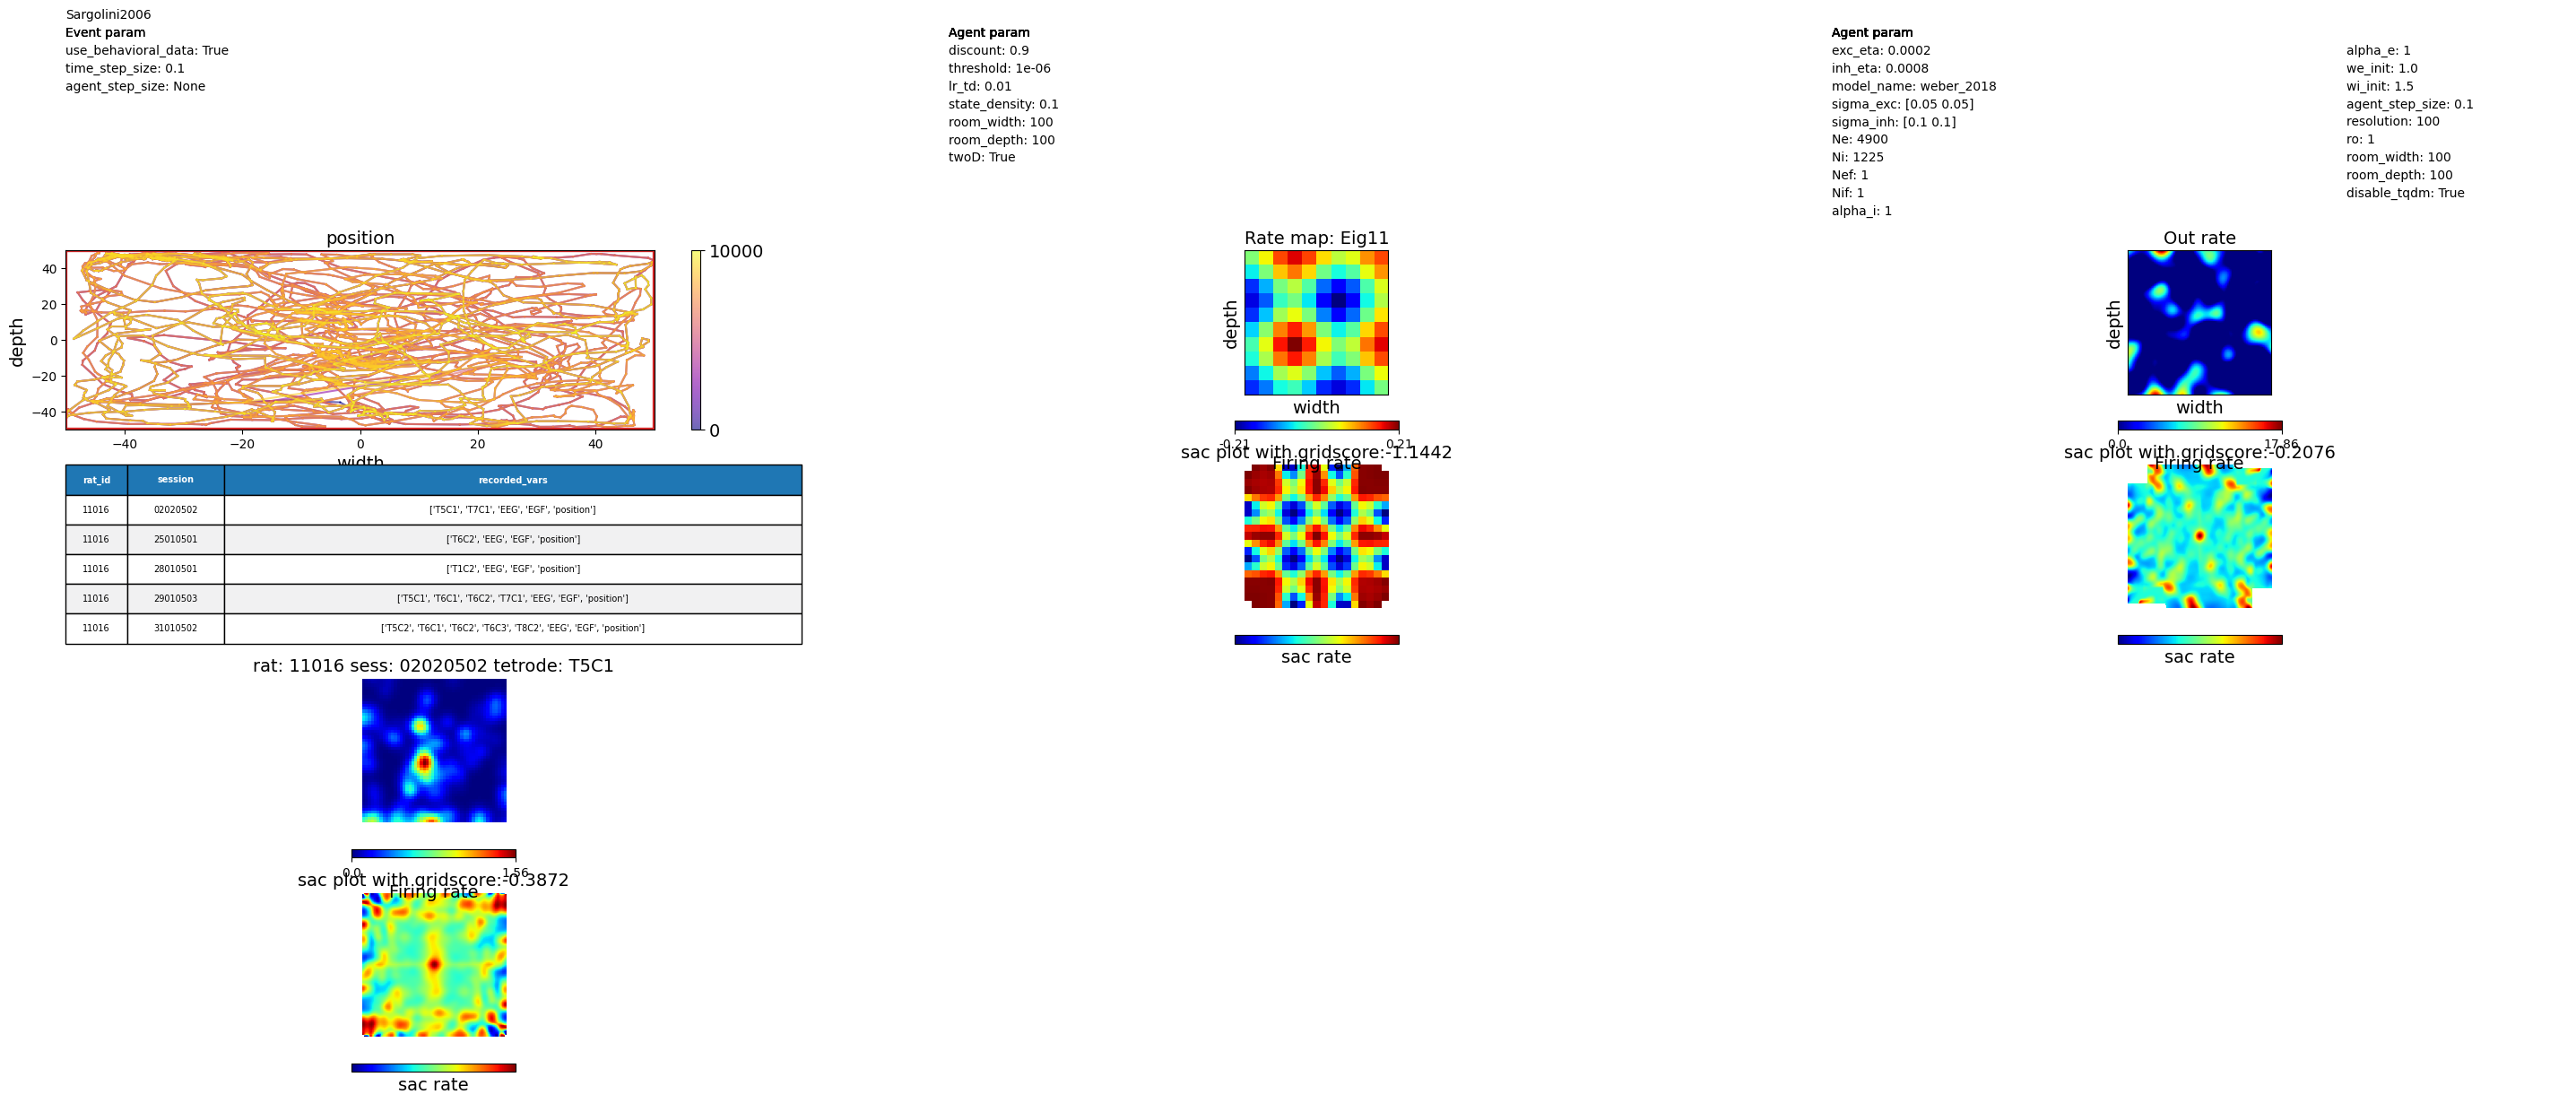

In [3]:


data_path = fetch_model_path("stachenfeld_2018_in_sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)


data_path = fetch_model_path("weber_2018_in_sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


agents=[agent_sr, agent]
parameters=[param_sr, param]
exp = Sargolini2006Data(verbose=False)
env=[env]

make_agent_comparison(env, parameters, agents, recording_index=0, GridScorer=GridScorer)


## Hafting environment

100%|█████████████████████████████████████| 22.0M/22.0M [00:00<00:00, 11.6GB/s]
Unzipping contents of '/home/rodrigo/.NeuralPlayground/data/stachenfeld_2018_in_hafting2008.zip' to '/home/rodrigo/.NeuralPlayground/data'


/home/rodrigo/.NeuralPlayground/data/stachenfeld_2018_in_hafting2008/


100%|██████████████████████████████████████| 69.3M/69.3M [00:00<00:00, 139GB/s]
Unzipping contents of '/home/rodrigo/.NeuralPlayground/data/weber_2018_in_hafting2008.zip' to '/home/rodrigo/.NeuralPlayground/data'
/home/rodrigo/anaconda3/envs/NPG-dev/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rodrigo/anaconda3/envs/NPG-dev/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/rodrigo/SSD/Projects/NeuralPlayground/neuralplayground/comparison/metrics.py:517: RuntimeWarning: All-NaN slice encountered
  in_range = (np.nanmin(image), np.nanmax(image))
/home/rodrigo/SSD/Projects/NeuralPlayground/neuralplayground/comparison/metrics.py:521: UserWarning: One or more intensity levels are NaN. Rescaling will broadcast NaN to the full image. Provide intensity levels yourself to avoid t

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig14'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:nan'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:nan'}, xlabel='width', ylabel='depth'>],
       [<Axes: title={'center': 'rat: 11015 sess: 13120410 tetrode: t5c1'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'rat: 11015 sess: 13120410 tetrode: t5c1'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >],
       [<Axes: title={'center': 'sac plot with gridscore:0.0098'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:0.00

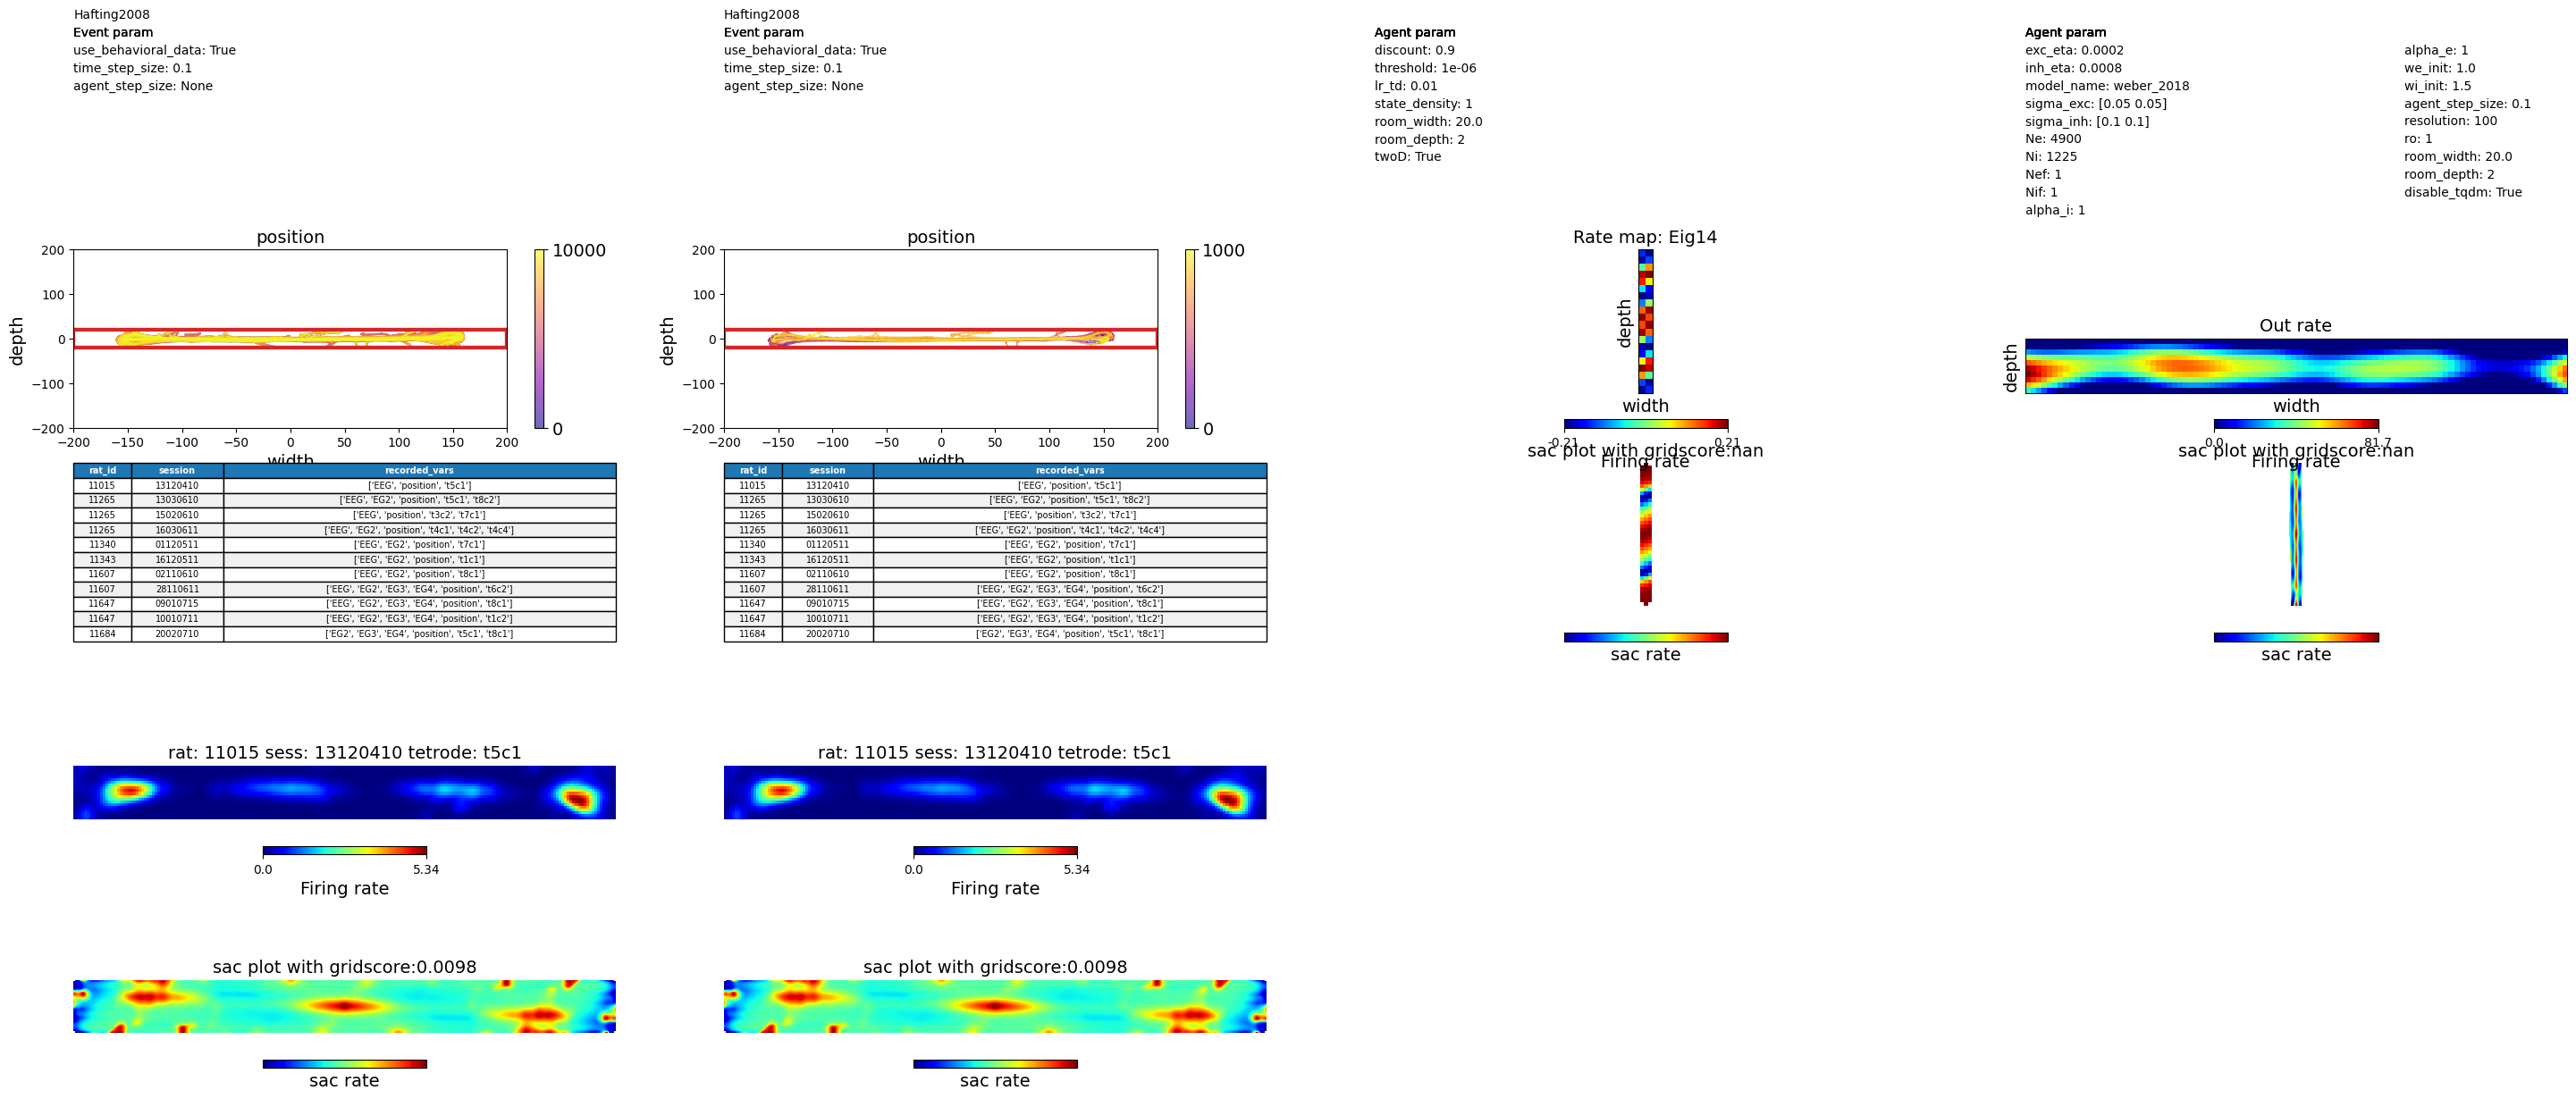

In [4]:

data_path = fetch_model_path("stachenfeld_2018_in_hafting2008")
print(data_path)
agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env_sr = pd.read_pickle(arena_path)



data_path = fetch_model_path("weber_2018_in_hafting2008")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)

agents=[agent_sr, agent]
parameters=[param_sr, param]
env=[env_sr, env]


make_agent_comparison(env, parameters, agents, recording_index=0, GridScorer=GridScorer)



# Train same agent in Different envs

We compare the same agent in different environements to compare their representations.


## Weber

/home/rodrigo/SSD/Projects/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/home/rodrigo/SSD/Projects/NeuralPlayground/neuralplayground/comparison/metrics.py:120: RuntimeWarning: invalid value encountered in sqrt
  mapStd = np.sqrt((sumOfSquares_x * N) - sums_x**2)
/home/rodrigo/SSD/Projects/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: divide by zero encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/home/rodrigo/anaconda3/envs/NPG-dev/lib/python3.11/site-packages/skimage/exposure/exposure.py:597: RuntimeWarning: invalid value encountered in subtract
  image = (image - imin) / (imax - imin)
/home/rodrigo/anaconda3/envs/NPG-dev/lib/python3.11/site-packages/skimage/exposure/exposure.py:597: RuntimeWarning: invalid value encountered in divide
  image = (image - imin) 

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >, <Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-0.1237'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.2076'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:nan'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'

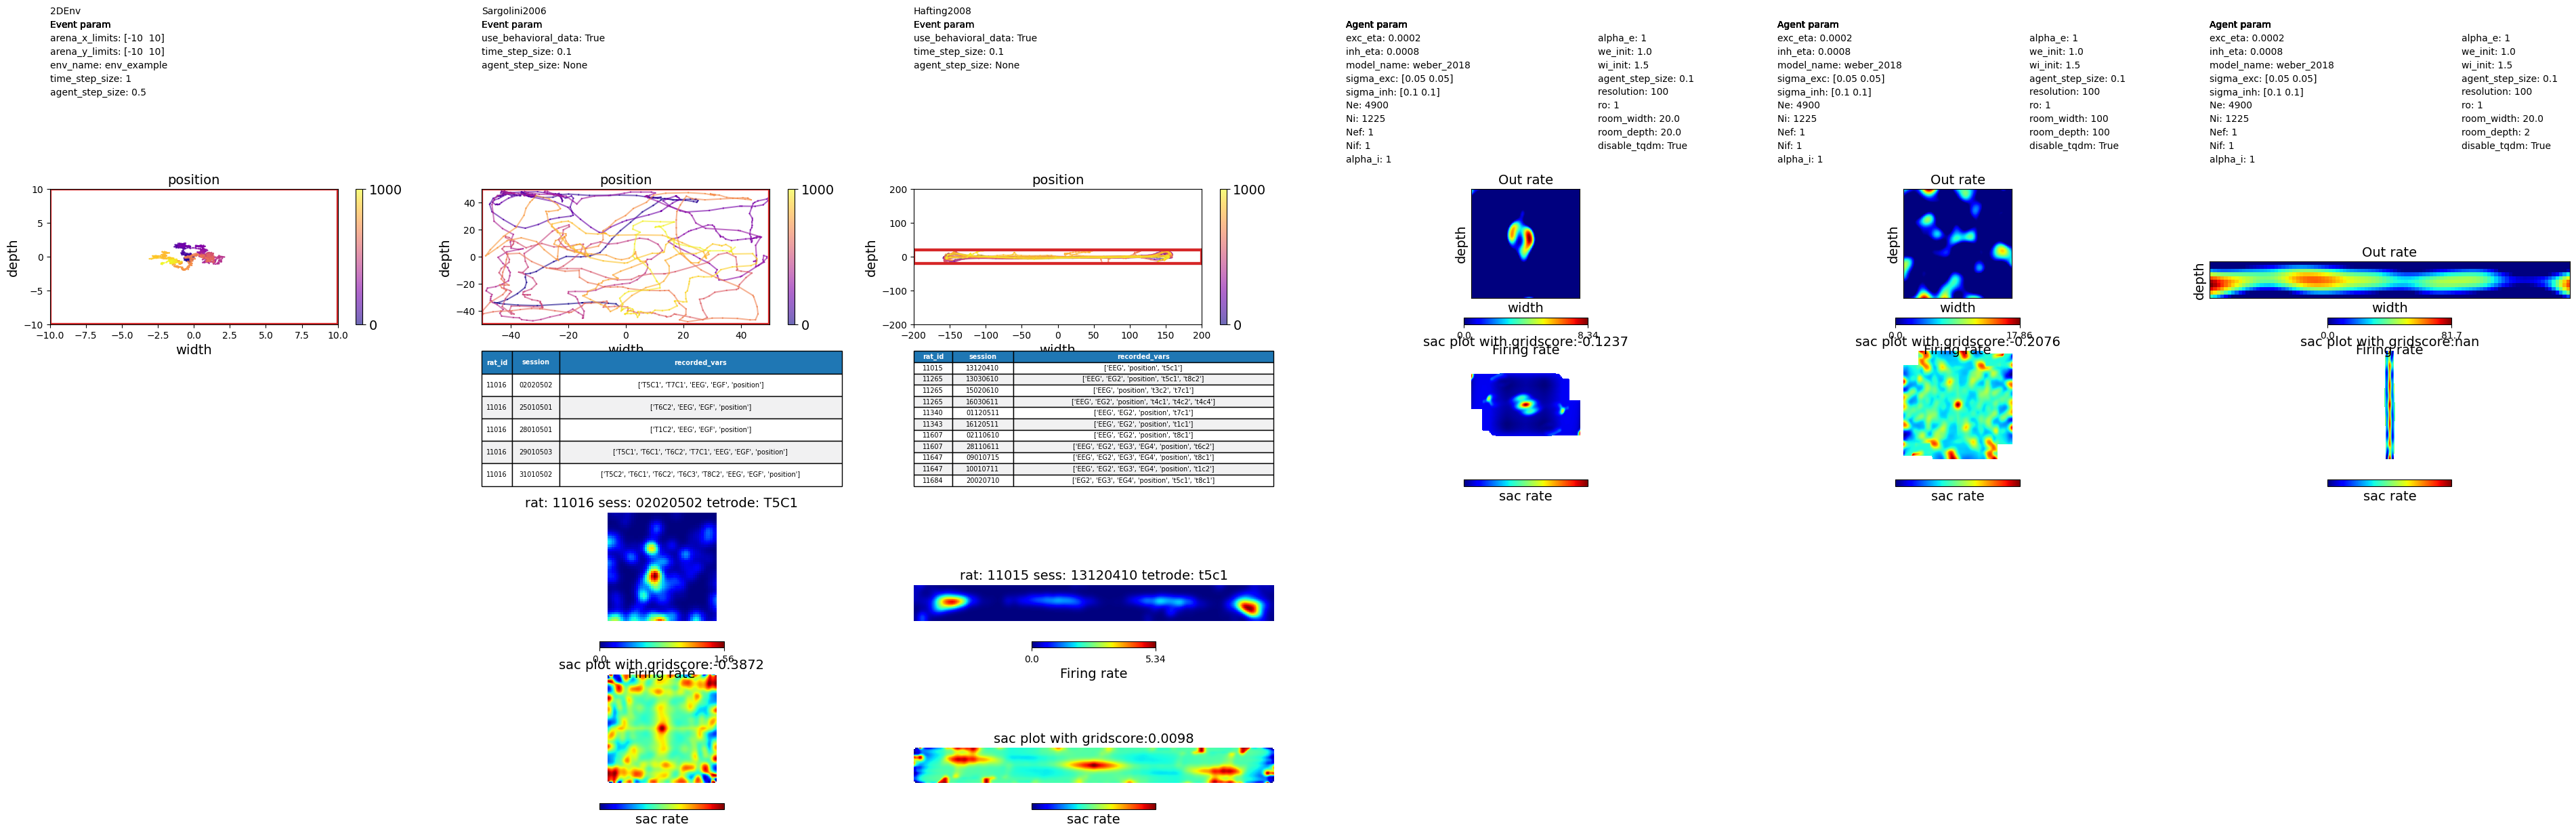

In [5]:
# Different Seed
data_path = fetch_model_path("weber_2018_in_hafting2008")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


env_H = pd.read_pickle(arena_path)
agent_H = pd.read_pickle(agent_path)
param_H = pd.read_pickle(param_path)


data_path = fetch_model_path("weber_2018_in_simple2D")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_2d = pd.read_pickle(agent_path)
param_2d = pd.read_pickle(param_path)
env_2d = pd.read_pickle(arena_path)

# Different Seed

data_path = fetch_model_path("weber_2018_in_hafting2008")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'


env_H = pd.read_pickle(arena_path)
agent_H = pd.read_pickle(agent_path)
param_H = pd.read_pickle(param_path)

# Different Env

data_path = fetch_model_path("weber_2018_in_sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)



agents=[agent_2d,agent,agent_H]
parameters=[param_2d,param,param_H]
env=[env_2d,env, env_H]



make_agent_comparison(env, parameters, agents, recording_index=0, GridScorer=GridScorer)




## Stackenfeld

/home/rodrigo/anaconda3/envs/NPG-dev/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rodrigo/anaconda3/envs/NPG-dev/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/rodrigo/SSD/Projects/NeuralPlayground/neuralplayground/comparison/metrics.py:517: RuntimeWarning: All-NaN slice encountered
  in_range = (np.nanmin(image), np.nanmax(image))
/home/rodrigo/SSD/Projects/NeuralPlayground/neuralplayground/comparison/metrics.py:521: UserWarning: One or more intensity levels are NaN. Rescaling will broadcast NaN to the full image. Provide intensity levels yourself to avoid this. E.g. with np.nanmin(image), np.nanmax(image).
  autoCorrMiddleRescaled = skimage.exposure.rescale_intensity(image, in_range, out_range)
/home/rodrigo/anaconda3/envs/NPG-dev/lib/python3.11/site-packages/skimag

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig5'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig16'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig17'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >, <Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-0.4953'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-1.1442'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:nan'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='wi

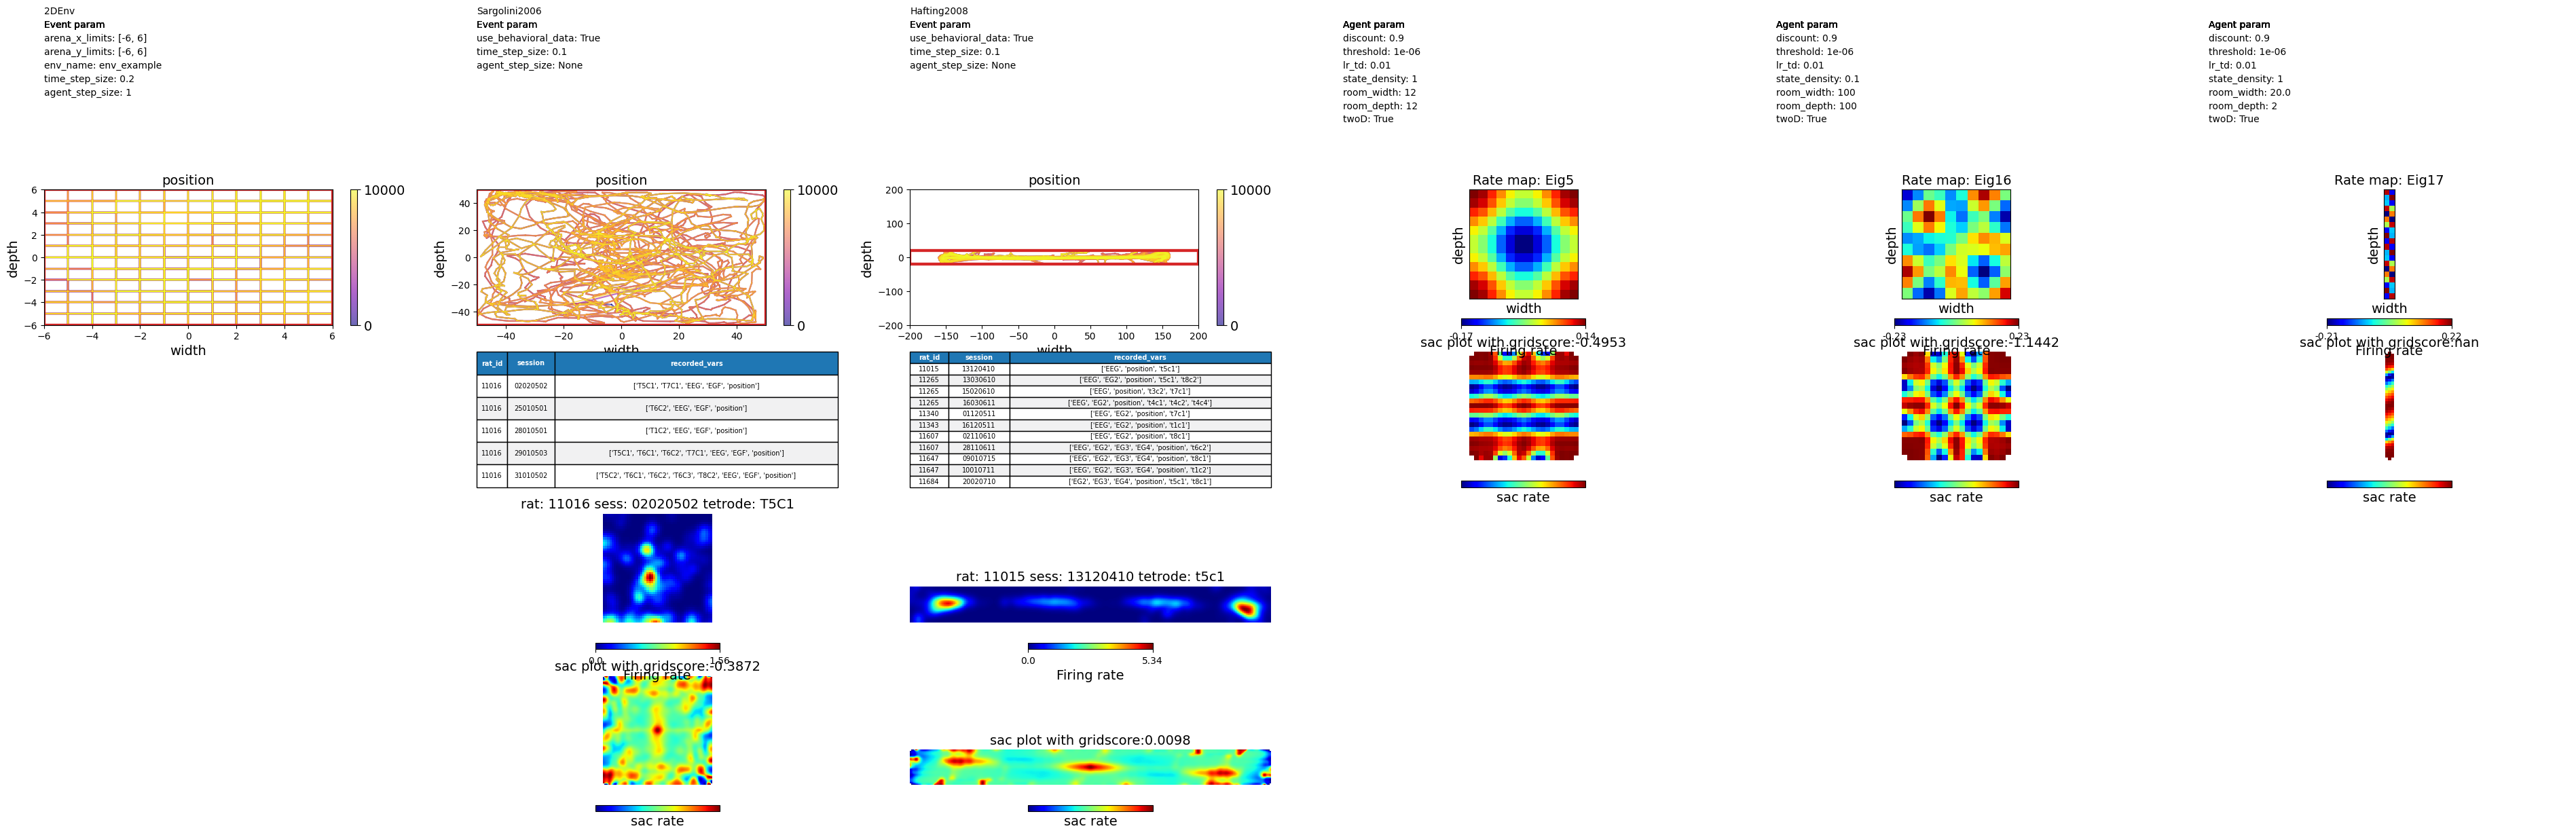

In [6]:

data_path = fetch_model_path("stachenfeld_2018_in_simple2D")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_2d = pd.read_pickle(agent_path)
param_2d = pd.read_pickle(param_path)
env_2d = pd.read_pickle(arena_path)



data_path = fetch_model_path("stachenfeld_2018_in_sargolini2006")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_S = pd.read_pickle(agent_path)
param_S = pd.read_pickle(param_path)
env_S = pd.read_pickle(arena_path)

data_path = fetch_model_path("stachenfeld_2018_in_hafting2008")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'

agent_sh = pd.read_pickle(agent_path)
param_sh = pd.read_pickle(param_path)
env_sh = pd.read_pickle(arena_path)



agents=[agent_2d,agent_S,agent_sh]
parameters=[param_2d,param_S,param_sh]
env=[env_2d,env_S,env_sh]


make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)


## Merging Room environment


100%|████████████████████████████████████████| 481M/481M [00:00<00:00, 692GB/s]
Unzipping contents of '/home/rodrigo/.NeuralPlayground/data/weber_2018_in_merging_room.zip' to '/home/rodrigo/.NeuralPlayground/data'
100%|████████████████████████████████████████| 577M/577M [00:00<00:00, 969GB/s]
Unzipping contents of '/home/rodrigo/.NeuralPlayground/data/weber_2018_in_wernle.zip' to '/home/rodrigo/.NeuralPlayground/data'
/home/rodrigo/SSD/Projects/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-0.1696'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.0584'}, xlabel='width', ylabel='depth'>],
       [<Axes: title={'center': 'sess_index_0_merged'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'sac plot with gridscore:0.791'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

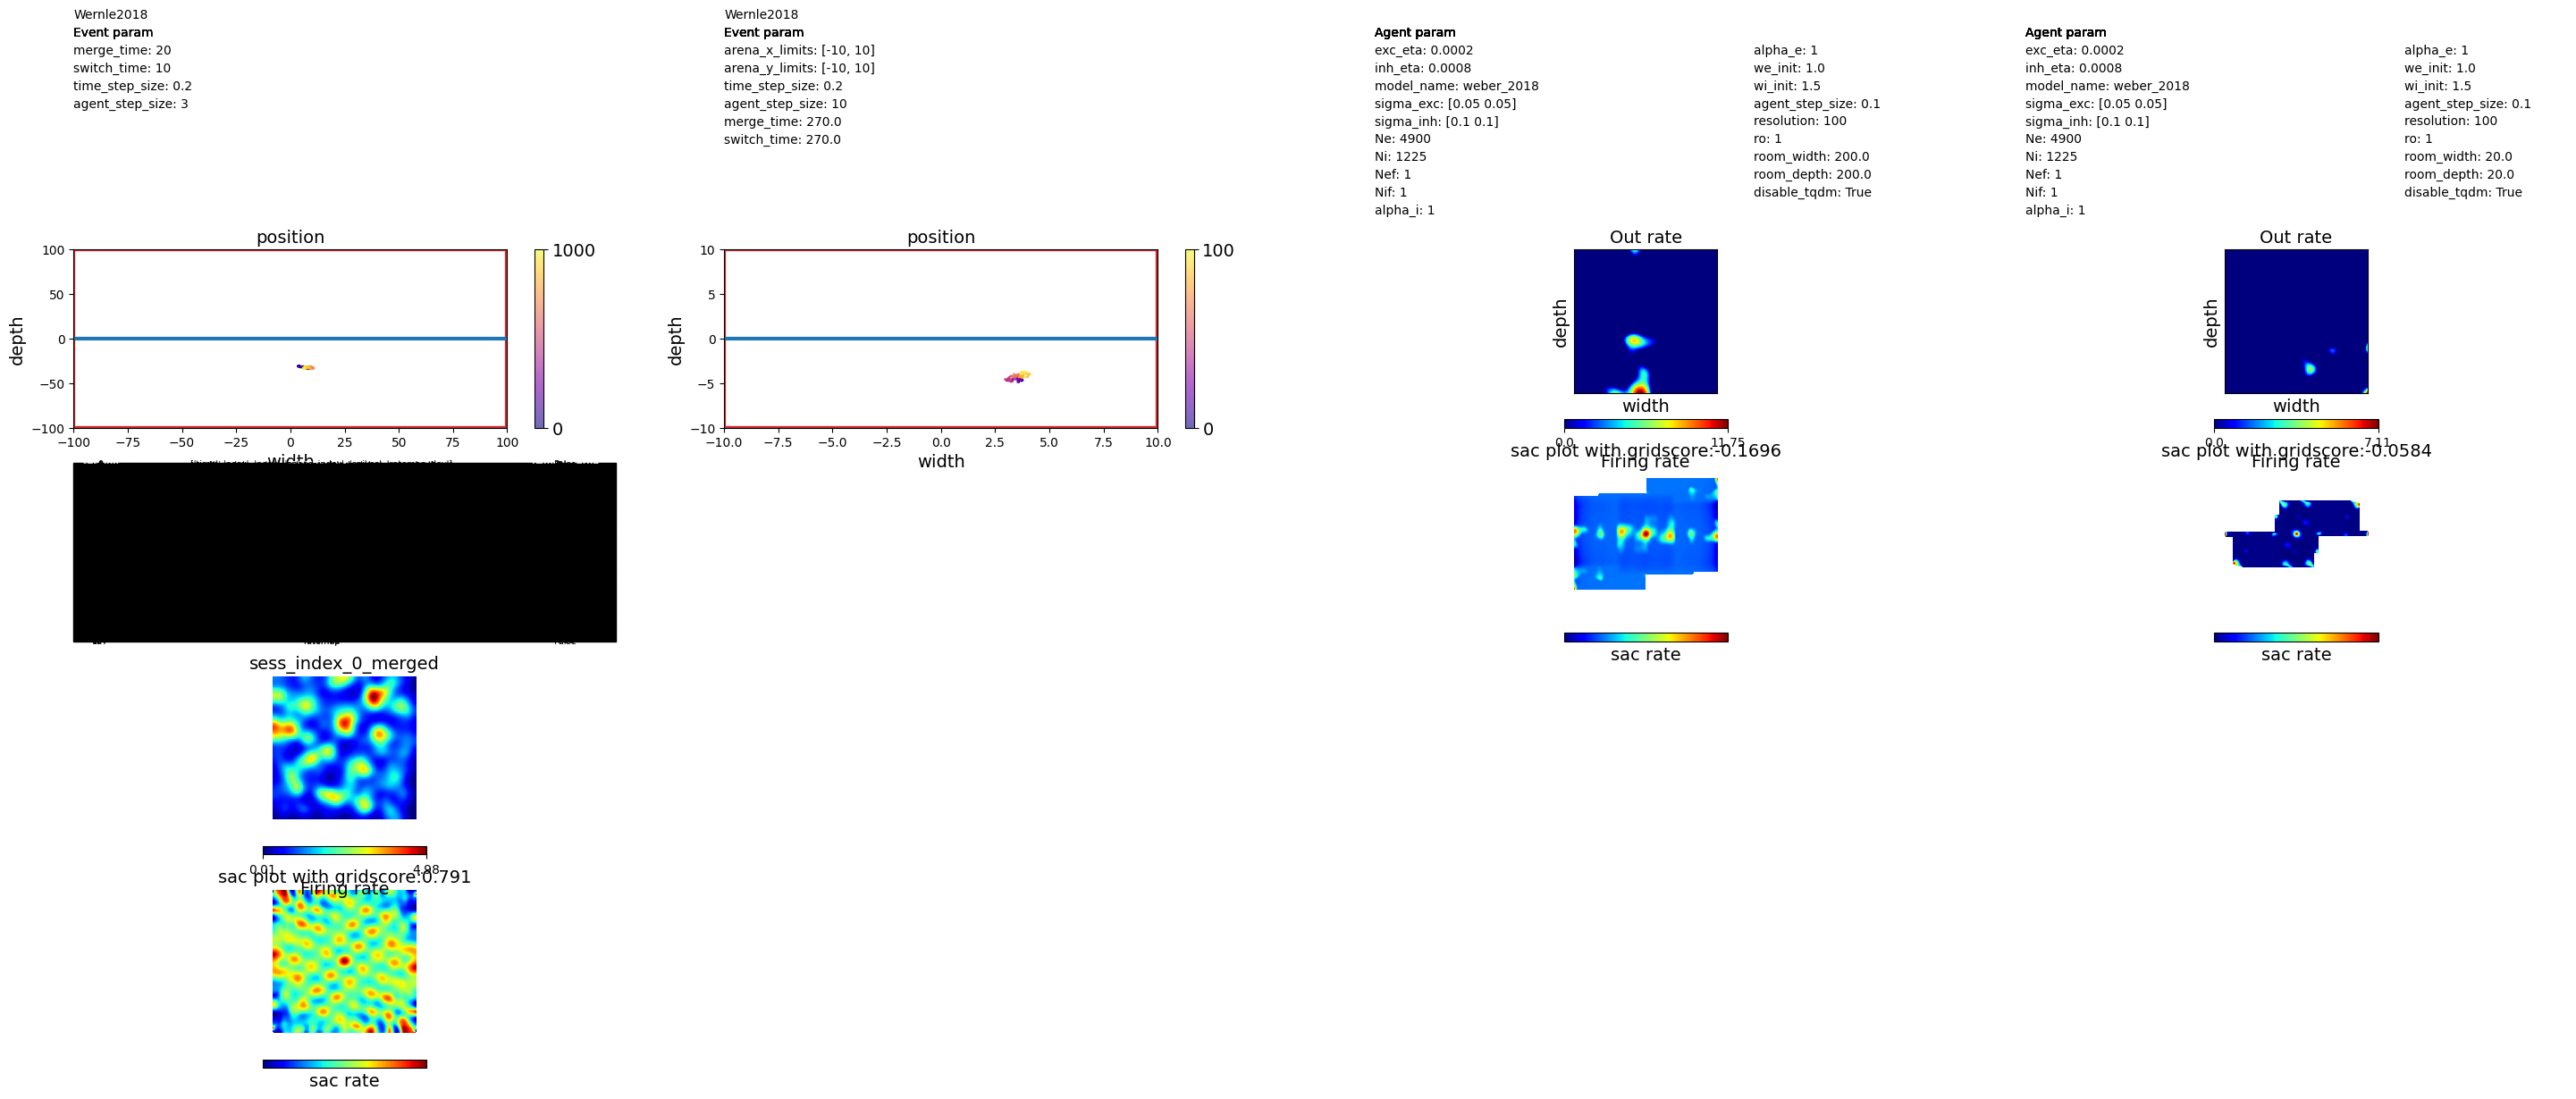

In [7]:

data_path = fetch_model_path("weber_2018_in_merging_room")


agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'



env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


data_path = fetch_model_path("weber_2018_in_wernle")

agent_path = data_path + '/agent'
param_path = data_path + '/params.dict'
arena_path = data_path + '/arena'



agent_W = pd.read_pickle(agent_path)
param_W = pd.read_pickle(param_path)
env_W = pd.read_pickle(arena_path)


agents=[agent_W,agent]
parameters=[param_W,param]
env=[env_W, env]
make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)








## Comparison from run agent

Here the agents are directly trained bellow and their results sent to be used in the comparison plots.

array([[<Axes: >, <Axes: >],
       [<Axes: >,
        <Axes: title={'center': 'Rate map: Eig14'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-0.4953'}, xlabel='width', ylabel='depth'>]],
      dtype=object)

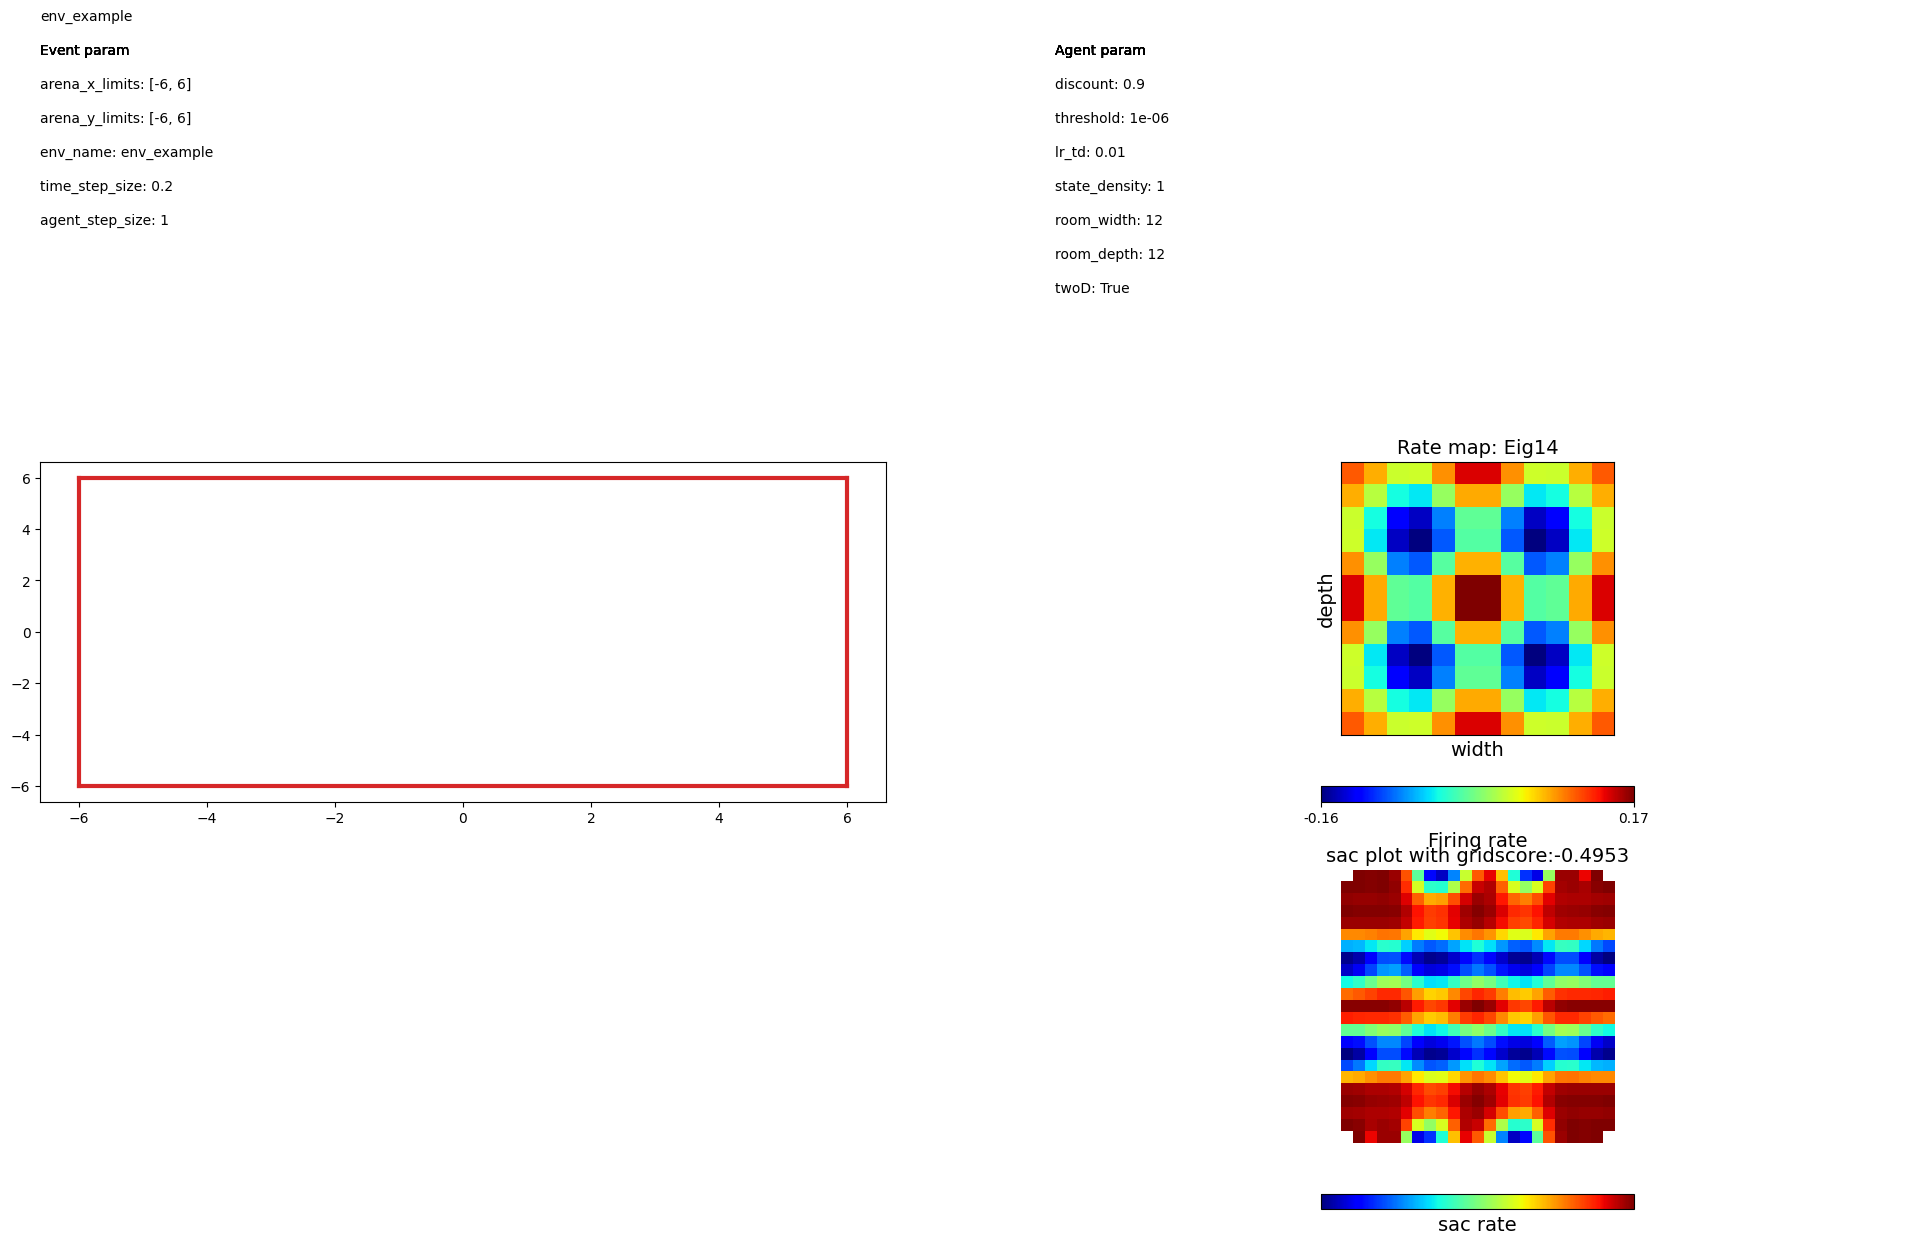

In [8]:
from neuralplayground.agents import  Stachenfeld2018
from neuralplayground.arenas import Simple2D, MergingRoom, Sargolini2006, Hafting2008, BasicSargolini2006,Wernle2018
from neuralplayground.backend import default_training_loop, episode_based_training_loop


stachenfeld_in_2d_params = {
    "simulation_id": "stachenfeld_2018_in_simple2D",
    "agent_class": Stachenfeld2018,
    "env_class": Simple2D,
    "env_params": {
        "arena_x_limits": [-6, 6],
        "arena_y_limits": [-6, 6],
        "env_name": "env_example",
        "time_step_size": 0.2,
        "agent_step_size": 1,
    },
    "agent_params": {
        "discount": 0.9,
        "threshold": 1e-6,
        "lr_td": 1e-2,
        "state_density": 1,
        "room_width": 12,
        "room_depth": 12,
        "twoD": True,
    },
    "training_loop": episode_based_training_loop,
    "training_loop_params": {"t_episode": 10000, "n_episode": 1000},
}

agent =  Stachenfeld2018(discount=stachenfeld_in_2d_params["agent_params"]["discount"], t_episode=stachenfeld_in_2d_params["training_loop_params"]["t_episode"], n_episode=stachenfeld_in_2d_params["training_loop_params"]["n_episode"], threshold= stachenfeld_in_2d_params["agent_params"]["threshold"], lr_td=stachenfeld_in_2d_params["agent_params"]["lr_td"],
               room_width=stachenfeld_in_2d_params["agent_params"]["room_width"], room_depth=stachenfeld_in_2d_params["agent_params"]["room_depth"], state_density= stachenfeld_in_2d_params["agent_params"]["state_density"],twoD=stachenfeld_in_2d_params["agent_params"]["twoD"])


room_width = [-6,6]
room_depth = [-6,6]
env_name = "env_example"
time_step_size = 0.2
agent_step_size = 1
# Init environment

env = Simple2D(environment_name = stachenfeld_in_2d_params["env_params"]["env_name"],
               arena_x_limits = stachenfeld_in_2d_params["env_params"]["arena_x_limits"],
               arena_y_limits = stachenfeld_in_2d_params["env_params"]["arena_y_limits"],
               time_step_size = stachenfeld_in_2d_params["env_params"]["time_step_size"] ,
               agent_step_size = stachenfeld_in_2d_params["env_params"]["agent_step_size"])

agents=[agent]
parameters=[stachenfeld_in_2d_params]
env=[env]

make_agent_comparison(env, parameters, agents, GridScorer=GridScorer)

